      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
13              6.6              0.16         0.40             1.5      0.044   
15              6.6              0.17         0.38             1.5      0.032   
17              6.2              0.66         0.48             1.2      0.029   
20              6.2              0.66         0.48             1.2      0.029   
21              6.4              0.31         0.38             2.9      0.038   
...             ...               ...          ...             ...        ...   
6439            7.4              0.25         0.29             2.2      0.054   
6442            8.4              0.37         0.43             2.3      0.063   
6447            7.4              0.36         0.30             1.8      0.074   
6453            7.0              0.56         0.17             1.7      0.065   
6482            6.7              0.32         0.44             2.4      0.061   

      free sulfur dioxide  

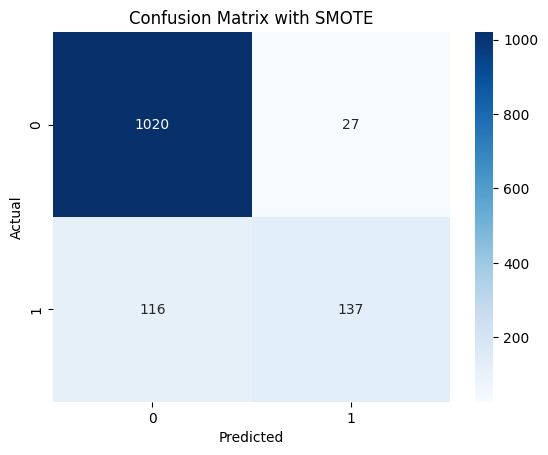

In [45]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

white_wine = pd.read_csv('./resources/winequality-white.csv', sep=';')
red_wine = pd.read_csv('./resources/winequality-red.csv', sep=';')

white_wine['type'] = '0'
red_wine['type'] = '1'
wine_data = pd.concat([white_wine, red_wine], ignore_index=True)
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x >= 7 else 0)
print(wine_data[wine_data['quality'] == 1])


rf = RandomForestClassifier(n_estimators=100, random_state=42)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SMOTE')
plt.show()


Try again using the SMOTE technique


Classification Report with SMOTE:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1047
           1       0.68      0.70      0.69       253

    accuracy                           0.88      1300
   macro avg       0.81      0.81      0.81      1300
weighted avg       0.88      0.88      0.88      1300



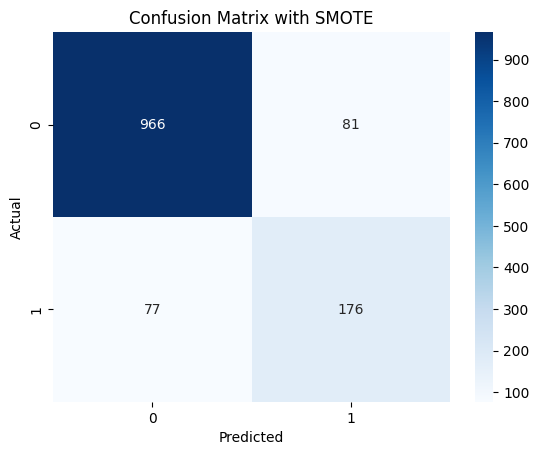

In [46]:
wine_data.drop("free sulfur dioxide", axis=1, inplace=True)
#wine_data.drop("total sulfur dioxide", axis=1, inplace=True)

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
rf_classifier_smote = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_classifier_smote.fit(X_train_res, y_train_res)
y_pred_smote = rf_classifier_smote.predict(X_test)
print("\nClassification Report with SMOTE:")
print(classification_report(y_test, y_pred_smote))

cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SMOTE')
plt.show()

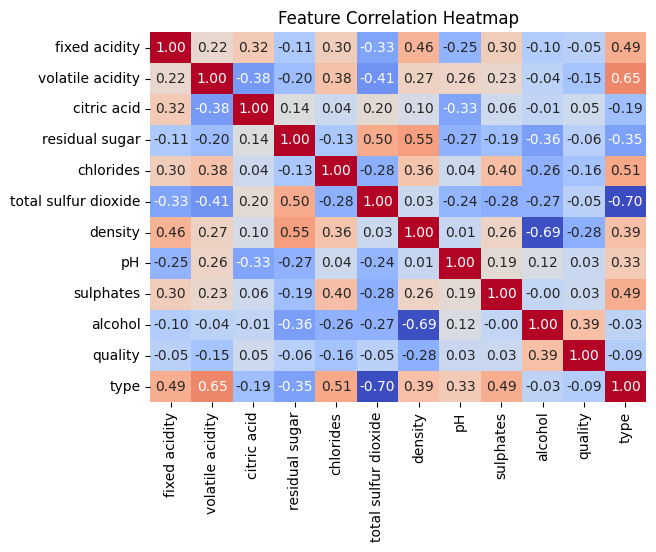

In [6]:
wine_data.drop("free sulfur dioxide", axis=1, inplace=True)
sns.heatmap(wine_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
plt.title('Feature Correlation Heatmap')
plt.show()

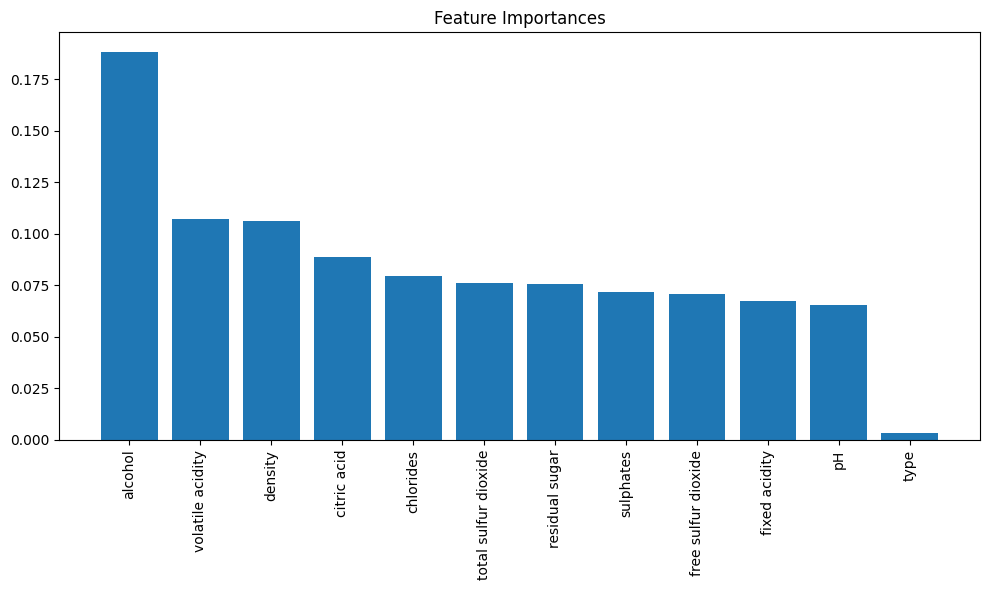

In [16]:
# feature importances
importances = rf_classifier_smote.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [42]:
input_data = np.array([
    12, 
    wine_data.pH.mean(), 
    wine_data["citric acid"].mean(), 
    wine_data["residual sugar"].mean(), 
    wine_data.chlorides.mean(), 
    wine_data["free sulfur dioxide"].mean(), 
    wine_data["total sulfur dioxide"].mean(), 
    wine_data.density.mean(), 
    wine_data.sulphates.mean(), 
    wine_data["fixed acidity"].mean(), 
    wine_data["volatile acidity"].mean()])
prediction = rf_classifier_smote.predict([input_data])
print(prediction)
print("Predicted quality for average wine:", "High Quality" if prediction[0] == 1 else "Low Quality")

[0]
Predicted quality for average wine: Low Quality
